<a href="https://colab.research.google.com/github/guzamaguza/Active-Record-Association-Methods-online-web-sp-000/blob/master/RB050_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression Model ML
https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4



In [55]:


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
#fault_data = pd.read_csv("RB050 Data 2022.csv")
fault_data = pd.read_csv("rb50.csv")
fault_data

fault_data.shape
fault_data.info()
fault_data.describe()

#date_fault = fault_data.assign(date = lambda x: fault_data['Start'])
#total_mins = fault_data.assign(total_mins = lambda x: fault_data['Total [mins]'])
#print(date)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Day Count      15 non-null     int64
 1   Total per Day  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


,Day Count,Total per Day
count,15.000000,15.000000
mean,7.000000,14.266667
std,4.472136,14.776751
min,0.000000,0.000000
25%,3.500000,0.000000
50%,7.000000,12.000000
75%,10.500000,24.000000
max,14.000000,48.000000


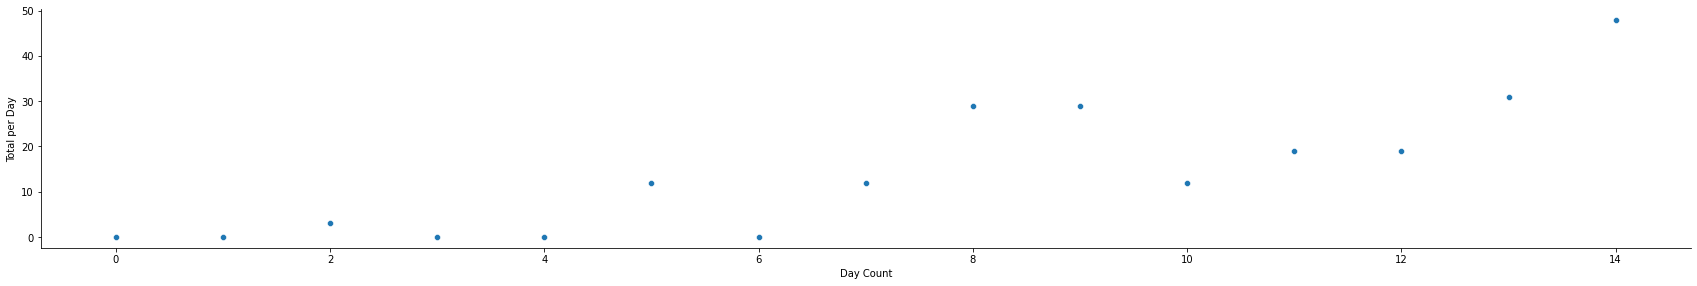

In [56]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

#Visualizing the data using scatter plot
sns.pairplot(fault_data, x_vars='Day Count', y_vars='Total per Day', size=4, aspect=6, kind='scatter')
plt.show() 

# Visualizing the data using heatmap
#sns.heatmap(fault_data.corr(), cmap="YlGnBu", annot = True)
#plt.show()

# plotting the points  
#plt.plot(date_fault, total_mins) 
    
# naming the x axis 
#plt.xlabel('x - axis') 
# naming the y axis 
#plt.ylabel('y - axis') 
    
# giving a title to my graph 
#plt.title('My first graph!') 
    
# function to show the plot 


In [57]:
# Creating X and y
X = fault_data['Day Count']
y = fault_data['Total per Day']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Take a look at the train dataset
print(X_train)
print(y_train)
#X[X.isnull() == True]

X.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

#plt.plot(X,y)
#plt.plot(X_train, y_train) 

10    10
5      5
2      2
4      4
0      0
11    11
7      7
3      3
14    14
8      8
Name: Day Count, dtype: int64
10    12
5     12
2      3
4      0
0      0
11    19
7     12
3      0
14    48
8     29
Name: Total per Day, dtype: int64


In [58]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
#ols_model = sm.OLS(fault_data.endog, fault_data.exog, missing='drop')
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total per Day   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     21.30
Date:                Tue, 29 Mar 2022   Prob (F-statistic):            0.00172
Time:                        04:28:38   Log-Likelihood:                -34.492
No. Observations:                  10   AIC:                             72.98
Df Residuals:                       8   BIC:                             73.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5459      4.927     -1.126      0.293     -16.908       5.816
Day Count      2.9759      0.645      4.616      0.002       1.489       4.463
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.547
Skew:                           0.095   Prob(JB):                        0.761
Kurtosis:                       1.870   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

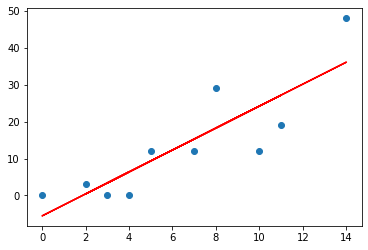

In [59]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -5.5459 + 2.9759*X_train, 'r')
plt.show()

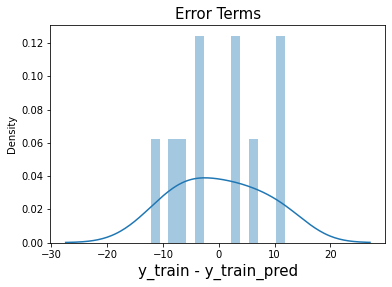

In [60]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

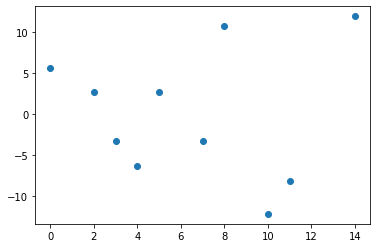

In [61]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [62]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
print(y_test_pred)
#print(X_test_sm)
#print(lr.predict(56))

9     21.237385
1     -2.569954
12    30.165138
13    33.141055
6     12.309633
dtype: float64


In [63]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6199887070268908

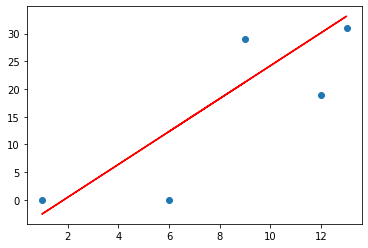

In [67]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()
#prediction = -5.5459 + 2.9759*(15)
#print(prediction)